**MOUNT DRIVE**

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import numpy as np

In [88]:
header = ['Region','Age','Income','Online Shopper']

In [89]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataPreprocessing.csv", header=None, names=header)

**REPLACE THE MISSING AS NAN**

In [90]:
df = df.replace('?', np.nan)
df

,Region,Age,Income,Online Shopper
0,Region,Age,Income,Online Shopper
1,India,49,86400.00,No
2,Brazil,32,57600.00,Yes
3,USA,35,64800.00,No
4,Brazil,43,73200.00,No
5,USA,45,NaN,Yes
6,India,40,69600.00,Yes
7,Brazil,NaN,62400.00,No
8,India,53,94800.00,Yes
9,USA,55,99600.00,No


In [123]:
print(df['Income'])

0       Income
1     86400.00
2     57600.00
3     64800.00
4     73200.00
6     69600.00
8     94800.00
9     99600.00
10    80400.00
Name: Income, dtype: object


**DROP THE NAN**

In [91]:
df = df.dropna(axis=0, how="any")
df

,Region,Age,Income,Online Shopper
0,Region,Age,Income,Online Shopper
1,India,49,86400.00,No
2,Brazil,32,57600.00,Yes
3,USA,35,64800.00,No
4,Brazil,43,73200.00,No
6,India,40,69600.00,Yes
8,India,53,94800.00,Yes
9,USA,55,99600.00,No
10,India,42,80400.00,Yes


In [92]:
print("Total samples:", len(df))

Total samples: 9


**PRINT PARTICULAR ROWS AND COLUMN**

In [93]:
print("Partial data\n", df.iloc[0:4, 0:3])

Partial data
    Region  Age    Income
0  Region  Age    Income
1   India   49  86400.00
2  Brazil   32  57600.00
3     USA   35  64800.00


**TARGETS**

In [94]:
targets = df['Region'].astype('category') 

In [95]:
label_color = ['red' if i=='ckd' else 'green' for i in targets] 
print(label_color[0:3], label_color[-3:-1])

['green', 'green', 'green'] ['green', 'green']


**CATEGORICAL**

In [96]:
categorical_ = ['Age','Online Shopper']

In [97]:
df = df.drop(labels=['Region'], axis=1)

In [98]:
df.drop(labels=categorical_, axis=1, inplace=True)

**DEPENDENT AND INDEPENDENT VARIABLES**

In [99]:
Dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataPreprocessing.csv")
# importing an array of features
x = Dataset.iloc[:, :-1].values 
# importing an array of dependent variable
y = Dataset.iloc[:, -1].values

In [100]:
print(x)

[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 nan]
 ['India' 40.0 69600.0]
 ['Brazil' nan 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]


In [101]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


**REPLACE THE MISSING VALUES**

In [102]:
from sklearn.impute import SimpleImputer

imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputa.fit(x[:, 1:3])

x[:, 1:3] = imputa.transform(x[:, 1:3])

In [103]:
print(x)

[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 76533.33333333333]
 ['India' 40.0 69600.0]
 ['Brazil' 43.77777777777778 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]


**ENCODING CATEGORICAL DATA**

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [105]:
print(x)

[[0.0 1.0 0.0 49.0 86400.0]
 [1.0 0.0 0.0 32.0 57600.0]
 [0.0 0.0 1.0 35.0 64800.0]
 [1.0 0.0 0.0 43.0 73200.0]
 [0.0 0.0 1.0 45.0 76533.33333333333]
 [0.0 1.0 0.0 40.0 69600.0]
 [1.0 0.0 0.0 43.77777777777778 62400.0]
 [0.0 1.0 0.0 53.0 94800.0]
 [0.0 0.0 1.0 55.0 99600.0]
 [0.0 1.0 0.0 42.0 80400.0]]


In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [107]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


**TRAINING AND TESTING**

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 1)

In [109]:
print(x_train)

[[1.0 0.0 0.0 43.77777777777778 62400.0]
 [0.0 0.0 1.0 45.0 76533.33333333333]
 [0.0 1.0 0.0 49.0 86400.0]
 [1.0 0.0 0.0 43.0 73200.0]
 [1.0 0.0 0.0 32.0 57600.0]
 [0.0 1.0 0.0 53.0 94800.0]
 [0.0 0.0 1.0 55.0 99600.0]
 [0.0 1.0 0.0 40.0 69600.0]]


In [110]:
print(x_test)

[[0.0 0.0 1.0 35.0 64800.0]
 [0.0 1.0 0.0 42.0 80400.0]]


In [111]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [112]:
print(y_test)

[0 1]


**STANDARD SCALER**

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we only aply the feature scaling on the features other than dummy variables.
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.fit_transform(x_test[:, 3:])

In [114]:
print(x_train)

[[1.0 0.0 0.0 -0.19159184384578545 -1.078125940841242]
 [0.0 0.0 1.0 -0.014117293757057777 -0.07013167641635393]
 [0.0 1.0 0.0 0.566708506533324 0.6335624327104554]
 [1.0 0.0 0.0 -0.30453019390224867 -0.30786617274297823]
 [1.0 0.0 0.0 -1.9018011447007988 -1.4204636155515815]
 [0.0 1.0 0.0 1.1475343068237058 1.2326533634535495]
 [0.0 0.0 1.0 1.4379472069688968 1.574991038163889]
 [0.0 1.0 0.0 -0.7401495441200351 -0.5646194287757329]]


In [115]:
print(x_test)

[[0.0 0.0 1.0 -1.0 -1.0]
 [0.0 1.0 0.0 1.0 1.0]]


**DATA REDUCTION USING PCA**

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [117]:
pca.fit(x) 
T= pca.transform(x)

In [118]:
T = pd.DataFrame(T)

In [119]:
T.columns = ['PCA component 1', 'PCA component 2']

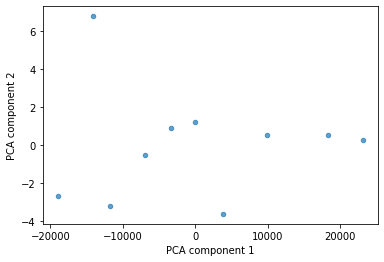

In [120]:
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o', alpha=0.7)